In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

#Necesarias para el guardado de la evolución de nuestra red
import os
import shutil

import cv2 

from tensorflow.keras import layers
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)


# Leemos ficheros Mnist
https://datahack.analyticsvidhya.com/contest/practice-problem-identify-the-digits/

In [2]:
def numeroHex(a,ponI,numDatos):
    resultado=""
    resultado2=0
    for i in range(numDatos):
        resultado+=str(int.from_bytes(a[i+ponI],"big"))
        resultado2=resultado2*256+int.from_bytes(a[i+ponI],"big")
    return resultado2

In [3]:
def cargarBinario(ruta):
    resultado=[]
    f=open(ruta,mode="rb")
    while (b:=f.read(1)):
        resultado.append(b)
    f.close()
    return resultado



#etiquetasEntrenamiento[4:8]

In [4]:
etiquetasEntrenamiento=cargarBinario("recursos/train-labels.idx1-ubyte")
imagenesEntrenamiento=cargarBinario("recursos/train-images.idx3-ubyte")
etiquetasTest=cargarBinario("recursos/t10k-labels.idx1-ubyte")
imagenesTest=cargarBinario("recursos/t10k-images.idx3-ubyte")



In [5]:
print("firma: "+str(numeroHex(imagenesEntrenamiento,0,4)))
numImagenes=numeroHex(imagenesEntrenamiento,4,4)
numImagenesTest=numeroHex(imagenesTest,4,4)
print("Número imágenes: "+str(numImagenes))
ancho=numeroHex(imagenesEntrenamiento,8,4)
print("Ancho: "+str(ancho))
alto=numeroHex(imagenesEntrenamiento,12,4)
print("Alto: "+str(alto))
#numeroHex(imagenesEntrenamiento,0,4)
#etiquetasEntrenamiento[]
len(imagenesTest)
#print("firma: "+str(numeroHex(imagenesTest,0,4)))
#numImagenes=numeroHex(imagenesTest,4,4)
#print("Número imágenes: "+str(numImagenes))

firma: 2051
Número imágenes: 60000
Ancho: 28
Alto: 28


7840016

In [6]:
def cogerImagen(datos,pos,ancho, alto, pixeles=1):
    imagen=[]
    posActual=pos
    for y in range(alto):
        
        columna=[]
        for x in range(ancho):
            celda=[]
            for p in range(pixeles):
                celda.append(int.from_bytes(datos[posActual],"big"))
                posActual+=1
            columna.append(celda)
        imagen.append(columna)
    return imagen,posActual
def cogerEtiquetas(datos, pos):
    return numeroHex(datos,pos,1), pos+1

In [7]:

posInicial=16
posEtiqueta=8
imagenes=[]
etiquetas=[]


for i in range(5000):
    imagen,posInicial=cogerImagen(imagenesEntrenamiento,posInicial,ancho,alto)
    imagenes.append(imagen)
    etiqueta,posEtiqueta=cogerEtiquetas(etiquetasEntrenamiento,posEtiqueta)
    etiquetas.append(np.array([etiqueta]))
posInicial=16
posEtiqueta=8

imagenesTst=[]
etiquetasTst=[]
for i in range(5000):
    imagen,posInicial=cogerImagen(imagenesTest,posInicial,ancho,alto)
    imagenesTst.append(imagen)
    etiqueta,posEtiqueta=cogerEtiquetas(etiquetasTest,posEtiqueta)
    etiquetasTst.append(np.array([etiqueta]))
    
for i in range(len(imagenes)):
    imagenes[i]=np.array(imagenes[i])/255
for i in range(len(imagenesTst)):
    imagenesTst[i]=np.array(imagenesTst[i])/255

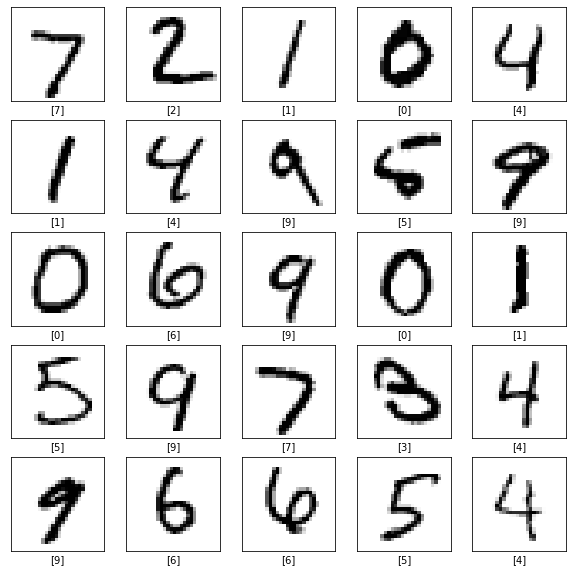

In [39]:
#imagenes[0]
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imagenesTst[i], cmap=plt.cm.binary)
    plt.xlabel(str(etiquetasTst[i]))

#plt.show()

In [9]:
imagenes=np.array(imagenes)
etiquetas=np.array(etiquetas)
imagenesTst=np.array(imagenesTst)
etiquetasTst=np.array(etiquetasTst)
imagenes[0].shape


(28, 28, 1)

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))


In [7]:
RUTA_FICHERO_PESOS_RAIZ="./modelos/numeros/"
RUTA_FICHERO_PESOS=RUTA_FICHERO_PESOS_RAIZ+"pesos.hdf5"
class salvar(tf.keras.callbacks.Callback):
  def on_train_batch_begin(self, batch, logs=None):
      return
  def on_train_batch_end(self, batch, logs=None):
      return
  def on_epoch_end(self, epoch, logs=None):
    if(os.path.isfile(RUTA_FICHERO_PESOS)):
        if(os.path.isfile(RUTA_FICHERO_PESOS+"_back")):
            os.remove(RUTA_FICHERO_PESOS+"_back")
        shutil.copyfile(RUTA_FICHERO_PESOS,RUTA_FICHERO_PESOS+"_back")
  def on_test_batch_begin(self, batch, logs=None):
      return
  def on_test_batch_end(self, batch, logs=None):
      return

In [43]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

checkpoint = tf.keras.callbacks.ModelCheckpoint(RUTA_FICHERO_PESOS, monitor='loss', verbose=1, save_best_only=True, mode='auto')
callbacks_list = [salvar(),checkpoint]


In [44]:

history = model.fit(imagenes, etiquetas, epochs=10, 
                    validation_data=(imagenesTst, etiquetasTst),callbacks = callbacks_list).history

Epoch 1/10
151/157 [===========================>..] - ETA: 0s - loss: 0.0195 - accuracy: 0.9919
Epoch 00001: loss improved from inf to 0.01912, saving model to ./modelos/numeros\pesos.hdf5
157/157 [==============================] - 1s 9ms/step - loss: 0.0191 - accuracy: 0.9922 - val_loss: 0.2325 - val_accuracy: 0.9440
Epoch 2/10
157/157 [==============================] - ETA: 0s - loss: 0.0213 - accuracy: 0.9932
Epoch 00002: loss did not improve from 0.01912
157/157 [==============================] - 1s 7ms/step - loss: 0.0213 - accuracy: 0.9932 - val_loss: 0.1183 - val_accuracy: 0.9686
Epoch 3/10
154/157 [============================>.] - ETA: 0s - loss: 0.0140 - accuracy: 0.9951
Epoch 00003: loss improved from 0.01912 to 0.01394, saving model to ./modelos/numeros\pesos.hdf5
157/157 [==============================] - 1s 8ms/step - loss: 0.0139 - accuracy: 0.9952 - val_loss: 0.1606 - val_accuracy: 0.9576
Epoch 4/10
157/157 [==============================] - ETA: 0s - loss: 0.0141 - acc

# Probamos la red

In [8]:
#model = construirModelo()
model.load_weights(RUTA_FICHERO_PESOS)
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer = 'adam')

In [9]:
def pintarImagen(imagen, etiqueta):
    plt.figure(figsize=(10,10))
    plt.imshow(imagen, cmap=plt.cm.binary)
    plt.xlabel(etiqueta)

    plt.show()


In [20]:
def dividir(img, ancho, alto, filas=-1, columnas=-1):
    partes=[]
    rangoY=len(img)-alto
    rangoX=len(img[0])-ancho

    rangoY=rangoY if filas<=0 or filas>rangoY else filas
    rangoX=rangoX if columnas<=0 or columnas>rangoX else columnas
    
    for y in range(rangoY):
        for x in range(rangoX):
            bloque=[]
            for al in range(alto):
                col=[]
                for an in range(ancho):
                    col.append(img[y+al][x+an])
                bloque.append(col)
            partes.append(bloque)
    return partes
def obtenerPorcion(img,posX, posY, ancho,alto):
    
    bloque=[]
    for al in range(alto):
        col=[]
        for an in range(ancho):
            col.append(img[posY+al][posX+an])
        bloque.append(col)
    return bloque

In [70]:
def predecirNumero(imgX, modelo=model, pintar=True):
    pre=modelo.predict(imgX)
    if pintar:
        plt.figure(figsize=(10,10))
        plt.imshow(imgX[0], cmap=plt.cm.binary)
        plt.xlabel(str(np.argmax(pre)))

        plt.show()
    return pre


In [75]:
img = cv2.imread('imagenesPruebas/matriculas/5d30202d0de694ec15349500-por-que-las-matriculas-de-los-coches-en-espana-no-tienen-vocales-te-habias-fijado.jpeg')
imgX=[]
for y in range(len(img)):
    col=[]
    for x in range(len(img[y])):
        col.append([((img[y][x][2]*0.3+img[y][x][1]*0.59+img[y][x][0]*0.11))/255])
        #col.append([img[y][x][2],img[y][x][1],img[y][x][0]])
    imgX.append(col)



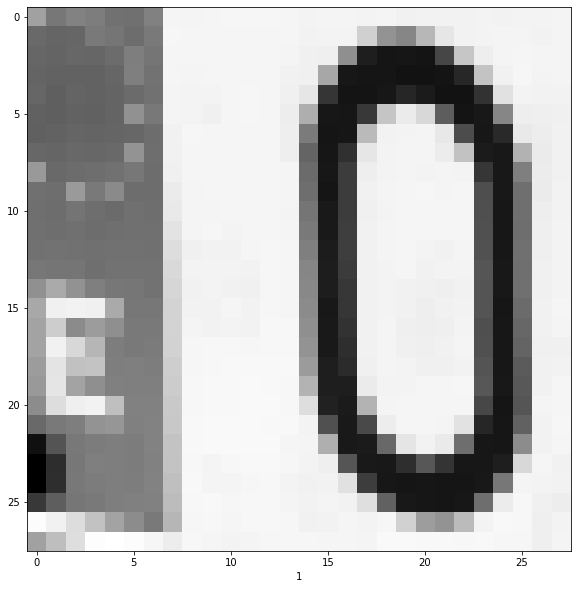

array([[ 1.8424565 , 16.617668  ,  1.3705409 , -8.433715  ,  0.44017383,
         0.4442686 ,  7.542461  , -0.8178387 ,  0.6673169 , -4.5816007 ]],
      dtype=float32)

In [76]:
#partes=dividir(imgX,120,120,5,5)
#print(shape(partes)
imagenDividida=np.array(obtenerPorcion(imgX,170,70,120,120))
imgReescalada=cv2.resize(imagenDividida , (ancho,alto), interpolation = cv2.INTER_AREA)

imgReescalada=np.reshape(imgReescalada,[imgReescalada.shape[0],imgReescalada.shape[1],1])

predecirNumero(np.array([imgReescalada]))


In [96]:
prueba=[[11,12,13],
[21,22,23],[31,32,33]]
print(prueba)
print(prueba[0:1,0:1])

[[11, 12, 13], [21, 22, 23], [31, 32, 33]]


TypeError: list indices must be integers or slices, not tuple

In [67]:


img = cv2.imread('imagenesPruebas/numero.png') 
print(img.shape)
imgX=[]

for y in range(28):
    c=[]
    for x in range(28):
         
        c.append([(img[y][x][0])/256])
    imgX.append(c)
imgX=np.array(imgX)
print(imgX.shape)

(28, 28, 3)
(28, 28, 1)


In [68]:
predecirNumero(np.array([imgX]))

TypeError: Invalid shape (1, 28, 28, 1) for image data

In [69]:
#imagenes[0].shape
#x=imagenes[4900]
#print(x)
pre=model.predict(np.array([imgX]))
pre

array([[ 3.2604294,  2.7242339, -3.5175257, -3.6839278,  7.768812 ,
         1.1210691, -0.5182001,  1.1712072, -0.8990282, -1.7351668]],
      dtype=float32)

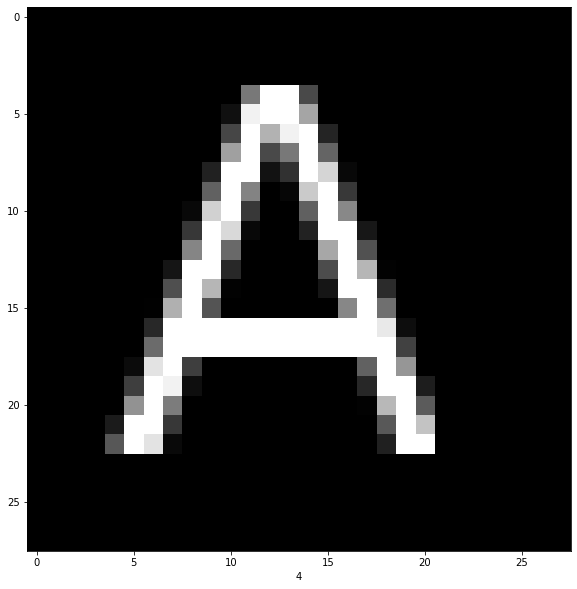

In [78]:


plt.figure(figsize=(10,10))
plt.imshow(imgX, cmap=plt.cm.binary)
plt.xlabel(str(np.argmax(pre)))

plt.show()